In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('events.csv',low_memory=False)

## Cantidad de veces que el evento fue realizado por primera vez por una persona

In [3]:
personEv=df.loc[:,['person','event']]
primerEv=personEv.groupby('person').first()
#primerEv.loc[primerEv['event']=='conversion']
primerEv['event'].value_counts()

visited site         11519
ad campaign hit       5598
search engine hit     4648
generic listing       2575
viewed product        1866
checkout               564
brand listing          485
conversion             185
lead                   110
searched products       47
staticpage              27
Name: event, dtype: int64

## Cuantas personas realizaron una compra

In [4]:
primerEv['columnaNueva']=1
primerEv=personEv.groupby(['person','event']).count()
#primerEv.loc[primerEv['event']=='conversion']
primerEv=primerEv.reset_index()
cantidadConversiones=primerEv.loc[primerEv['event']=='conversion',:]
cantidadConversiones['event'].value_counts()

conversion    716
Name: event, dtype: int64

In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

# De los que compraron, cuantos hicieron cada evento

In [6]:
compras = df.loc[df.event=='conversion']

In [7]:
nocompras = df.loc[df.event!='conversion']

In [8]:
def hizocompra (x):
    return (pd.Series(x.unique()).isin(compras['person'])).sum()
nocompras.groupby('event').agg({'person':hizocompra}).sort_values('person')

,person
event,
lead,58
staticpage,294
searched products,422
search engine hit,511
brand listing,512
ad campaign hit,559
generic listing,589
visited site,631
viewed product,636


In [9]:
compras['person'].unique().size

716

# Cantidad de eventos que realizan hasta la primera compra

In [10]:
df['sum']=1

In [11]:
df1 = df[['sum','event','person']].loc[df['person'].isin(compras['person']),:]
gperson = df1.groupby('person')

In [17]:
def columnas (x):
    x['suma'] = x['sum'].cumsum()
    return x['suma'].loc[x.event=='conversion'].head(1)
a = gperson.apply(columnas)

In [18]:
b = a.to_frame()

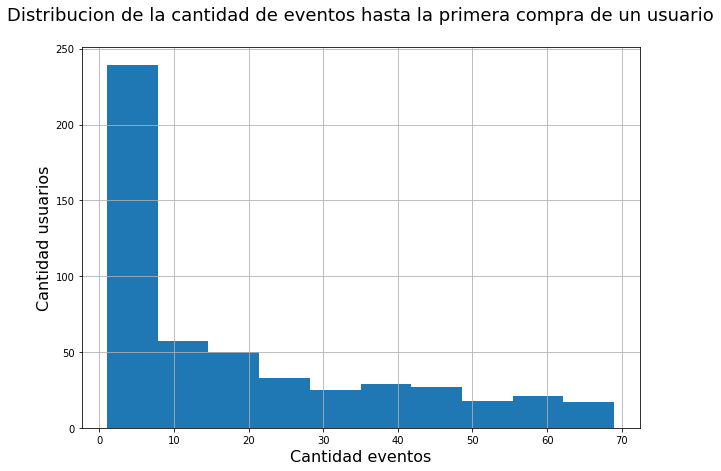

In [26]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=7
plt.rcParams["figure.figsize"] = fig_size

plt.title('Distribucion de la cantidad de eventos hasta la primera compra de un usuario\n',size=18)
#plotear solo los que hicieron menos de:
limite=70

b.loc[b['suma']<limite]['suma'].plot.hist()
plt.xlabel('Cantidad eventos', size = 16)
plt.ylabel('Cantidad usuarios', size = 16)
plt.grid(True)
plt.show()

In [15]:
a.describe()

count    716.000000
mean      61.991620
std      106.415835
min        1.000000
25%        1.000000
50%       23.000000
75%       80.000000
max      895.000000
Name: suma, dtype: float64